In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

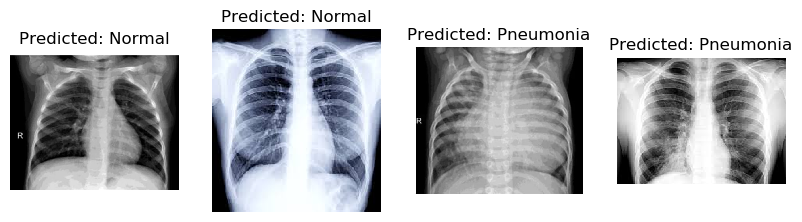

In [5]:
# Load your trained model
model = load_model("D:\\SKAY\\Projects\\KEEP\\VScode\\Pneumonia\\Models\\Pnemoniamodel.h5")  # Replace with the path to your trained model file

# Function to preprocess images for prediction
def preprocess_image(img):
    # Add any necessary preprocessing steps (resizing, normalization, etc.)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Load multiple images
img_paths = ['n1.jpg', 'n3.jpg','p1.jpg','p3.jpg']

# Create a figure to display the images with predictions
plt.figure(figsize=(10, 5))

# Iterate through the image paths
for i, img_path in enumerate(img_paths, 1):
    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # Convert BGR to RGB (OpenCV loads images in BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess the image for prediction
    img_processed = preprocess_image(img_rgb)

    # Expand dimensions to match model input shape (batch size of 1)
    img_processed = np.expand_dims(img_processed, axis=0)

    # Predict using the model
    prediction = model.predict(img_processed)

    # Get the predicted class (0: Normal, 1: Pneumonia)
    predicted_class = 1 if prediction > 0.5 else 0

    # Display the image with the predicted class
    plt.subplot(1, len(img_paths), i)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Predicted: {"Pneumonia" if predicted_class == 1 else "Normal"}')

# Show the figure with all images
plt.show()